<a href="https://colab.research.google.com/github/ShriomiGite/Deep-Learning/blob/main/REDWINE_QUALITY_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.layers import Dropout

In [ ]:
#EDA

In [ ]:
df=pd.read_csv("wineQualityReds.csv")
df.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#to check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1599 non-null   int64  
 1   fixed.acidity         1599 non-null   float64
 2   volatile.acidity      1599 non-null   float64
 3   citric.acid           1599 non-null   float64
 4   residual.sugar        1599 non-null   float64
 5   chlorides             1599 non-null   float64
 6   free.sulfur.dioxide   1599 non-null   float64
 7   total.sulfur.dioxide  1599 non-null   float64
 8   density               1599 non-null   float64
 9   pH                    1599 non-null   float64
 10  sulphates             1599 non-null   float64
 11  alcohol               1599 non-null   float64
 12  quality               1599 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


In [ ]:
#to check the statistical information
df.describe()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,800.000000,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,461.735855,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,1.000000,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,400.500000,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,800.000000,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,1199.500000,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,1599.000000,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
df.quality.value_counts()

5.000000    681
6.000000    638
7.000000    199
4.000000     53
5.625716     28
Name: quality, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

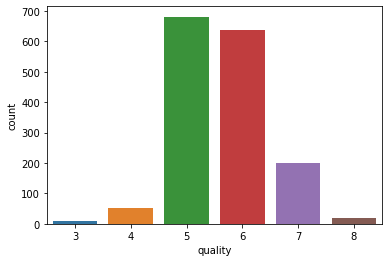

In [ ]:
#counting the output variables
sns.countplot(x="quality",data=df)

In [ ]:
#we can see that 3 & 8 quality is near to zero


<Axes: xlabel='quality'>

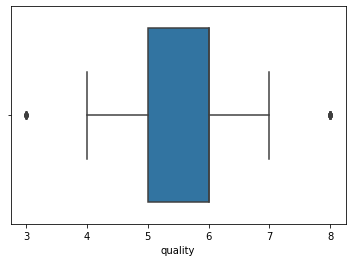

In [ ]:
#checking the outliers
sns.boxplot(x="quality",data=df)

In [ ]:
#we can see that 3 & 8 are the outliers hence discard them
Q1=df.quality.quantile(0.25)
Q3=df.quality.quantile(0.75)
IQR=Q3-Q1
print(IQR)

1.0


In [ ]:
#TO REMOVE THE OUTLIER
df.quality=df.quality[~((df.quality<(Q1-1.5*IQR)) | (df.quality>(Q3+1.5*IQR)))]

<Axes: xlabel='quality'>

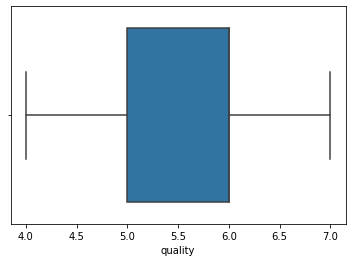

In [ ]:
sns.boxplot(x="quality",data=df)

In [ ]:
#now we can see that there are no outliers in the data

In [ ]:
#to check the null value
df.isnull().sum()

Unnamed: 0               0
fixed.acidity            0
volatile.acidity         0
citric.acid              0
residual.sugar           0
chlorides                0
free.sulfur.dioxide      0
total.sulfur.dioxide     0
density                  0
pH                       0
sulphates                0
alcohol                  0
quality                 28
dtype: int64

In [ ]:
df.quality=df.quality.replace(np.NaN,df.quality.mean())

In [ ]:
df.isnull().sum()

Unnamed: 0              0
fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
#splitting the data into input & output variable
x=df.iloc[:,1:-1].values
y=df.iloc[:,-1].values

In [ ]:
#to scale data to 0-1
sc=StandardScaler()
x=sc.fit_transform(x)

In [ ]:
#to split the data into training and testing
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)


In [ ]:
#to create the function
ann=Sequential()

#to add hidden layers and dropout
ann.add(Dense(units=512,activation="relu"))
ann.add(Dropout(rate=0.3))
ann.add(Dense(units=512,activation="relu"))
ann.add(Dropout(rate=0.3))
ann.add(Dense(units=512,activation="relu"))


#to add output layer
ann.add(Dense(units=1)) 
#to establish connection between the layers
ann.compile(optimizer="adam",loss="mse")


In [ ]:
#to add Early Stopping to get minimum error points
earlystop=EarlyStopping(mode="min",verbose=1,patience=25)


In [ ]:
ann.fit(xtrain,ytrain,epochs=500,validation_data=(xtest,ytest),callbacks=earlystop)

Epoch 1/500
35/35 [==============================] - 6s 37ms/step - loss: 6.2934 - val_loss: 2.9281
Epoch 2/500
35/35 [==============================] - 1s 31ms/step - loss: 1.9369 - val_loss: 1.7544
Epoch 3/500
35/35 [==============================] - 1s 27ms/step - loss: 1.4475 - val_loss: 1.2625
Epoch 4/500
35/35 [==============================] - 1s 29ms/step - loss: 1.1757 - val_loss: 1.0935
Epoch 5/500
35/35 [==============================] - 1s 20ms/step - loss: 0.9763 - val_loss: 0.7631
Epoch 6/500
35/35 [==============================] - 1s 32ms/step - loss: 0.8193 - val_loss: 0.6753
Epoch 7/500
35/35 [==============================] - 1s 27ms/step - loss: 0.7946 - val_loss: 0.7311
Epoch 8/500
35/35 [==============================] - 2s 44ms/step - loss: 0.6672 - val_loss: 0.5976
Epoch 9/500
35/35 [==============================] - 2s 47ms/step - loss: 0.6333 - val_loss: 0.6704
Epoch 10/500
35/35 [==============================] - 1s 39ms/step - loss: 0.5838 - val_loss: 0.5944

In [ ]:
#to check the loss 
lossdf=pd.DataFrame(ann.history.history)
lossdf.head()

,loss,val_loss
0,6.293423,2.928060
1,1.936918,1.754447
2,1.447473,1.262526
3,1.175720,1.093483
4,0.976297,0.763060


<Axes: >

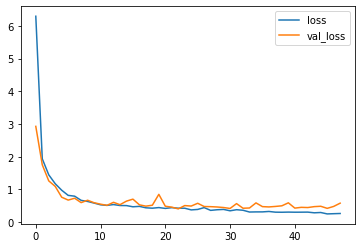

In [ ]:
#to plot the loss graph
lossdf.plot()

In [ ]:
ypred=ann.predict(xtest)

15/15 [==============================] - 0s 5ms/step


In [ ]:
print("MSE",mean_squared_error(ytest,ypred))
print("RMSE",np.sqrt(mean_squared_error(ytest,ypred)))

MSE 0.5810659118909851
RMSE 0.762276794800278


In [ ]:
#to check the linearity between actual and predicted
dic={"Actual Y":ytest,"Pred Y":ypred.flatten()}
df1=pd.DataFrame(dic)

<Axes: xlabel='Actual Y', ylabel='Pred Y'>

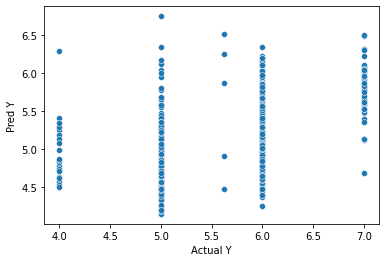

In [ ]:
#to plot a scatter plot for the same
sns.scatterplot(x="Actual Y",y="Pred Y",data=df1)

In [ ]:
#unknown data prediction
newdata=[[11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8]]
newdata=sc.transform(newdata)

In [ ]:
ann.predict(newdata)

1/1 [==============================] - 0s 52ms/step


array([[5.250942]], dtype=float32)

In [ ]:
ann.save("PRED_REDWINE_QUALITY")

In [ ]:
#to store the data in the file directory
from keras.models import load_model
model=load_model("PRED_REDWINE_QUALITY")


In [ ]:
model.predict(newdata)

1/1 [==============================] - 0s 115ms/step


array([[5.250942]], dtype=float32)